# Slugging Percentages
## Author: Matthew Chin (2021)

**Data**
https://github.com/chadwickbureau/baseballdatabank

In [1]:
# plotly standard imports
import plotly.graph_objs as go
import chart_studio.plotly as py

# Cufflinks wrapper on plotly
import cufflinks

# Data science imports
import pandas as pd
import numpy as np

# Options for pandas
pd.options.display.max_columns = 999

# Display all cell outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

# from __future__ import print_function, division
import matplotlib as mpl
import matplotlib.pyplot as plt
# %matplotlib inline

from plotly.offline import iplot
cufflinks.go_offline()

# Set global theme
cufflinks.set_config_file(world_readable=True, theme='pearl')

## Slugging Percentage

A batter's slugging percentage involves not only how frequently but how far they get on base when they hit. When they go to bat and they get on base safely with a hit, it increases their chances at getting home. In that case, one's slugging percentage will go up if they hit a single, but goes even farther up if they get on safely with an extra base hit (XBH) or with a home run and touch all four bases. 

Extra base hits and home runs matter for the significance of one's slugging percentage because the power and speed of a batter are considered to know how many bases they touch per at-bat.  

Walks or base on balls (BB) are not considered because they are not hits. 

The formula for slugging is as follows 
(Reference: https://www.mlb.com/glossary/standard-stats/slugging-percentage#:~:text=Definition,hits%20are%20not%20valued%20equally.):

Let $1B$ be a single, $2B$ be a double, $3B$ be a triple, and $HR$ be a home run. 

The formula is:

$SLG = \frac{1B + (2\times2B) + (3\times3B )+ (4\times HR)}{AB}$

In [2]:
# Get slugging percentages from Batting data
slugpct = pd.read_csv("https://raw.githubusercontent.com/chadwickbureau/baseballdatabank/master/core/Batting.csv",sep=',')

In [3]:
# Get batters who are sluggers from People data
slugppl = pd.read_csv("https://raw.githubusercontent.com/chadwickbureau/baseballdatabank/master/core/People.csv",sep=',')

In [4]:
# Sample of slugpct beginning or end values
# Later cells are the most recent

# slugpct.head()
slugpct.tail()

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
108784,zimmebr02,2020,1,BAL,AL,2,0,0,0,0,0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
108785,zimmejo02,2020,1,DET,AL,3,0,0,0,0,0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
108786,zimmeky01,2020,1,KCA,AL,16,0,0,0,0,0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
108787,zuberty01,2020,1,KCA,AL,23,0,0,0,0,0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
108788,zuninmi01,2020,1,TBA,AL,28,75,8,11,4,0,4,10.0,0.0,0.0,6,37.0,0.0,3.0,0.0,0.0,0.0


In [5]:
# Print array values
slugpct

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
0,abercda01,1871,1,TRO,NaN,1,4,0,0,0,0,0,0.0,0.0,0.0,0,0.0,NaN,NaN,NaN,NaN,0.0
1,addybo01,1871,1,RC1,NaN,25,118,30,32,6,0,0,13.0,8.0,1.0,4,0.0,NaN,NaN,NaN,NaN,0.0
2,allisar01,1871,1,CL1,NaN,29,137,28,40,4,5,0,19.0,3.0,1.0,2,5.0,NaN,NaN,NaN,NaN,1.0
3,allisdo01,1871,1,WS3,NaN,27,133,28,44,10,2,2,27.0,1.0,1.0,0,2.0,NaN,NaN,NaN,NaN,0.0
4,ansonca01,1871,1,RC1,NaN,25,120,29,39,11,3,0,16.0,6.0,2.0,2,1.0,NaN,NaN,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108784,zimmebr02,2020,1,BAL,AL,2,0,0,0,0,0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
108785,zimmejo02,2020,1,DET,AL,3,0,0,0,0,0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
108786,zimmeky01,2020,1,KCA,AL,16,0,0,0,0,0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
108787,zuberty01,2020,1,KCA,AL,23,0,0,0,0,0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
slugarr = slugpct.to_numpy()
slugarr


array([['abercda01', 1871, 1, ..., nan, nan, 0.0],
       ['addybo01', 1871, 1, ..., nan, nan, 0.0],
       ['allisar01', 1871, 1, ..., nan, nan, 1.0],
       ...,
       ['zimmeky01', 2020, 1, ..., 0.0, 0.0, 0.0],
       ['zuberty01', 2020, 1, ..., 0.0, 0.0, 0.0],
       ['zuninmi01', 2020, 1, ..., 0.0, 0.0, 0.0]], dtype=object)

In [21]:
slugpct.columns

Index(['playerID', 'yearID', 'stint', 'teamID', 'lgID', 'G', 'AB', 'R', 'H',
       '2B', '3B', 'HR', 'RBI', 'SB', 'CS', 'BB', 'SO', 'IBB', 'HBP', 'SH',
       'SF', 'GIDP'],
      dtype='object')

In [32]:
# import csv
# fcsv = "slugpct.csv"

In [49]:
# Find players whose hits are more than 0
# Take 2019 data
# Get data from American League (AL)

for a in slugarr:
    if a[1] == 2019 and a[4] == 'AL' and a[8] != 0:
        print("Player: ", a[0], "\tBatting Avg:", "{:.3f}".format(a[8]/a[6]), "\tHits:", a[8], 
        '\tSingles: ', a[8]-(a[9]+a[10]+a[11]), '\t2B:', a[9], '\t3B:', a[10], '\tHR:', a[11])

            

Player:  abreujo02 	Batting Avg: 0.284 	Hits: 180 	Singles:  108 	2B: 38 	3B: 1 	HR: 33
Player:  adamewi01 	Batting Avg: 0.254 	Hits: 135 	Singles:  89 	2B: 25 	3B: 1 	HR: 20
Player:  adriaeh01 	Batting Avg: 0.272 	Hits: 55 	Singles:  39 	2B: 8 	3B: 3 	HR: 5
Player:  aguilje01 	Batting Avg: 0.261 	Hits: 24 	Singles:  17 	2B: 3 	3B: 0 	HR: 4
Player:  alberha01 	Batting Avg: 0.305 	Hits: 160 	Singles:  125 	2B: 21 	3B: 2 	HR: 12
Player:  alforan01 	Batting Avg: 0.179 	Hits: 5 	Singles:  4 	2B: 0 	3B: 0 	HR: 1
Player:  allengr01 	Batting Avg: 0.229 	Hits: 53 	Singles:  37 	2B: 9 	3B: 3 	HR: 4
Player:  alonsyo01 	Batting Avg: 0.178 	Hits: 39 	Singles:  26 	2B: 6 	3B: 0 	HR: 7
Player:  altuvjo01 	Batting Avg: 0.298 	Hits: 149 	Singles:  88 	2B: 27 	3B: 3 	HR: 31
Player:  alvaryo01 	Batting Avg: 0.313 	Hits: 98 	Singles:  45 	2B: 26 	3B: 0 	HR: 27
Player:  anderbr04 	Batting Avg: 0.500 	Hits: 4 	Singles:  4 	2B: 0 	3B: 0 	HR: 0
Player:  anderti01 	Batting Avg: 0.335 	Hits: 167 	Singles:  117

In [45]:
len(slugpct)
# len(slugarr)

108789

In [50]:
# NL slugging pct in 2019 by players with at least 50 ABs & 25 hits

slglist = [] * len(slugpct)

for a in slugarr:
    if a[1] == 2019 and a[4] == 'NL' and a[6] >= 50 and a[8] >= 25:
        singles = a[8]-(a[9]+a[10]+a[11])
        d = a[9]
        t = a[10]
        hr = a[11]
        slugging = (singles + (2*d) + (3*t) + (4*hr))/a[6]
        print("Player: ", a[0], "\tBatting Avg:", "{:.3f}".format(a[8]/a[6]), "\tAB:", a[6], 
        "\tSlugging:", "{:.3f}".format(slugging))


Player:  acunaro01 	Batting Avg: 0.280 	AB: 626 	Slugging: 0.518
Player:  adamsma01 	Batting Avg: 0.226 	AB: 310 	Slugging: 0.465
Player:  aguilje01 	Batting Avg: 0.225 	AB: 222 	Slugging: 0.374
Player:  ahmedni01 	Batting Avg: 0.254 	AB: 556 	Slugging: 0.437
Player:  albieoz01 	Batting Avg: 0.295 	AB: 640 	Slugging: 0.500
Player:  alfarjo01 	Batting Avg: 0.262 	AB: 431 	Slugging: 0.425
Player:  almoral01 	Batting Avg: 0.236 	AB: 339 	Slugging: 0.381
Player:  alonspe01 	Batting Avg: 0.260 	AB: 597 	Slugging: 0.583
Player:  anderbr06 	Batting Avg: 0.261 	AB: 459 	Slugging: 0.468
Player:  aquinar01 	Batting Avg: 0.259 	AB: 205 	Slugging: 0.576
Player:  arciaor01 	Batting Avg: 0.223 	AB: 494 	Slugging: 0.350
Player:  arenano01 	Batting Avg: 0.315 	AB: 588 	Slugging: 0.583
Player:  avilaal01 	Batting Avg: 0.207 	AB: 164 	Slugging: 0.421
Player:  baderha01 	Batting Avg: 0.205 	AB: 347 	Slugging: 0.366
Player:  baezja01 	Batting Avg: 0.281 	AB: 531 	Slugging: 0.531
Player:  barneau01 	Battin

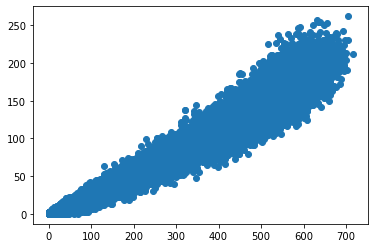

In [40]:
# Test scatterplot
plt.scatter(slugpct.AB, slugpct.H)

<h1>On-Base Percentage Plus Slugging (OPS)</h1>

On-Base Percentage Plus Slugging